# 神經網路 / Neural Network

利用以下準備好的工具，建構一個簡單的神經網路模型，並利用這個模型辨識 [MNIST](http://yann.lecun.com/exdb/mnist/) 手寫數字圖片資料。本教學使用 [Keras](https://github.com/fchollet/keras)，一款 Python 深度學習框架，提供建構神經網路所需要的各種模型、函式、以及演算法。

## [MNIST](http://yann.lecun.com/exdb/mnist/) 手寫數字圖片資料

- 訓練資料 60000 筆
- 測試資料 10000 筆
- 圖片長寬為 28x28
- 圖片為灰階，每個像素由一個 0~255 整數表示
- 圖片類別為 0~9

本教學已經整理好 MNIST 資料，過程詳見下方[附錄：處理 MNIST 資料](#附錄：處理 MNIST 資料)，可以直接使用 `prepared.x_train`、`prepared.y_train`、`prepared.x_test`、`prepared.y_test`。其中：

- x 為圖片像素，一筆資料已從二維(28x28)的 0~255 矩陣轉換為一維(784)的 0~1 實數矩陣。
- y 為圖片類別，一筆資料已從一個 0~9 整數轉換為 10 維的獨熱(one-hot)編碼向量。

可以使用 `prepared.plot_images()` 將資料畫出來：

In [ ]:
import sys
sys.path.append('.prepared')
import nn as prepared

print(prepared.x_train.shape, prepared.y_train.shape, prepared.x_test.shape, prepared.y_test.shape)
prepared.plot_images(prepared.x_train[:10], prepared.y_train[:10]) # try other samples

## keras.Model

Keras 提供一些模型基底，可以從這些基底開始，設計自己的神經網路模型。請參考 [About Keras models](https://keras.io/models/about-keras-models/) 了解 Keras 模型。

In [ ]:
from keras.models import Sequential

model = Sequential()

一個神經網路模型可以呼叫 `model.add()` 增加隱藏層，Keras 提供許多隱藏層的實作，讓你可以專注於隱藏層的選擇策略以及參數調整。常見的有 `Dense` (全連結層)與 `Dropout` 等等，可以透過 `activation` 參數設定該層的激活函數。可以呼叫 `model.summary()` 檢視設計好的模型。請參考 [About Keras layers](https://keras.io/layers/about-keras-layers/) 了解 Keras 層，參考 [Activations](https://keras.io/activations/) 了解激活函數。

In [ ]:
from keras.layers import Dense

model.add(Dense(16, input_dim=784))
model.add(Dense(1, activation='sigmoid'))
model.summary()

模型設計完需要呼叫 `compile()` 編譯之後才能使用，在編譯時可以設定損失函數(`loss`)、評估標準(`metrics`)以及等優化器(`optimizer`)參數。請參考 [compile()](https://keras.io/models/sequential/#compile) 了解編譯，參考 [Losses](https://keras.io/losses/) 了解損失函數，參考 [Optimizers](https://keras.io/optimizers/) 了解優化器。

In [ ]:
model.compile(loss='binary_crossentropy', metrics = ['accuracy'], optimizer='adam')

編譯完成的模型可以呼叫 `fit()` 訓練模型，訓練時需給定訓練資料(`prepared.x_train` 與 `prepared.y_train`)並設定 `batch_size`、`epochs` 等參數。請參考 [fit()](https://keras.io/models/sequential/#fit)。

In [ ]:
import sys
sys.path.append('.prepared')
import nn as prepared

model.fit(prepared.x_train, prepared.y_train, batch_size=10000, epochs=1, verbose=1)

訓練完成的模型可以呼叫 `predict()` 進行預測。請參考 [predict()](https://keras.io/models/sequential/#predict)。

In [ ]:
y_pred = model.predict(prepared.x_test)
prepared.plot_images(prepared.x_test[:10], y_pred[:10]) # try other samples

或是直接呼叫 `evaluate()` 評估效能。請參考 [evaluate()](https://keras.io/models/sequential/#evaluate)。

In [ ]:
score = model.evaluate(prepared.x_test, prepared.y_test)
print('loss: %f, accuracy: %f' % (score[0], score[1]))

## prepared.demo_mnist_nn()

使用 MNIST 的測試資料建構示範神經網路並回傳，詳見下方[示範神經網路](#示範神經網路)的程式碼範例。

## prepared.plot_images(x, y, figsize=(15, 1.5), cols=10)

繪製 MNIST 圖片，詳見下方[示範神經網路](#示範神經網路)的程式碼範例。
- `x`: 圖片像素，一筆資料為一維(784)的 0~1 實數矩陣。
- `y`: 圖片類別，一筆資料為 10 維的獨熱(one-hot)編碼向量。
- `figsize`: 圖片的寬度與高度。
- `cols`: 一橫列繪製幾筆資料。

## prepared.x_train, prepared.y_train, prepared.x_test, prepared.y_test

MNIST 資料，依序為訓練圖片像素、訓練圖片類別、測試圖片特徵、測試圖片類別資料。資料格式詳見上方 [MNIST-手寫數字圖片資料](#MNIST-手寫數字圖片資料)。

# 示範神經網路

使用示範神經網路(`demo_nn`)預測 MNIST 的測試資料(`x_test`)，繪製預測結果(`y_pred`)並評估其效能。請修改下方[動手做](#動手做)的程式碼試著超越這個示範神經網路。

Using TensorFlow backend.


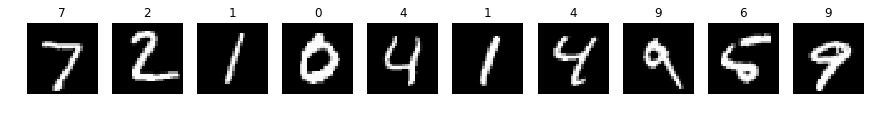

10000/10000 [==============================] - 0s 40us/step
loss: 0.269980, accuracy: 0.925000


In [1]:
import sys
sys.path.append('.prepared')
import nn as prepared

demo_nn = prepared.demo_mnist_nn()
y_pred = demo_nn.predict(prepared.x_test)
prepared.plot_images(prepared.x_test[:10], y_pred[:10]) # try other samples
score = demo_nn.evaluate(prepared.x_test, prepared.y_test)
print('loss: %f, accuracy: %f' % (score[0], score[1]))

# 動手做

修改以下程式碼，試著建構比示範神經網路更好的模型。換句話說，在測試資料上的正確率超過 `0.922400`。

Epoch 1/1
60000/60000 [==============================] - 1s 16us/step - loss: 2.2330 - acc: 0.1942


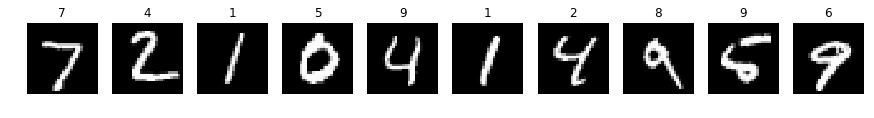

10000/10000 [==============================] - 0s 31us/step
loss: 2.000550, accuracy: 0.380200


In [2]:
import sys
sys.path.append('.prepared')
import nn as prepared

from keras.models import Sequential

# TODO: import classifiers you want to use
from keras.layers import Dense, Activation

model = Sequential()

# TODO: try different network structures and activation functions
model.add(Dense(16, input_dim=784))
model.add(Dense(10, activation='softmax'))

# TODO: try different optimizers
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')

# TODO: try different `batch_size` and `epochs`
model.fit(prepared.x_train, prepared.y_train, batch_size=10000, epochs=1, verbose=1)

y_pred = model.predict(prepared.x_test)
prepared.plot_images(prepared.x_test[:10], y_pred[:10]) # try other samples
score = model.evaluate(prepared.x_test, prepared.y_test)
print('loss: %f, accuracy: %f' % (score[0], score[1]))

# 附錄：處理 MNIST 資料

如果想更了解 MNIST 資料，可以參考以下整理 MNIST 資料的程式碼，練習自己處理資料。

In [ ]:
from keras.utils import to_categorical
from keras.utils.data_utils import get_file
import numpy as np

# download from aws
path = get_file(
    'mnist.npz',
    'https://s3.amazonaws.com/img-datasets/mnist.npz',
    cache_dir='.',
    cache_subdir='.',
    file_hash='8a61469f7ea1b51cbae51d4f78837e45'
)

# load and normalize
f = np.load(path)
x_train, y_train = f['x_train'] / 255, f['y_train']
x_test, y_test = f['x_test'] / 255, f['y_test']
f.close()

# reshape
print(x_train.shape, x_test.shape)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
print(x_train.shape, x_test.shape)

# one-hot encoding
print(y_train.shape, y_test.shape)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape, y_test.shape)